In [1]:
import numpy as np 
import pandas as pd 
import cv2
import os
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import glob as gb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
arr_al={'COVID':0,
        'Normal':1,
        'Viral Pneumonia':2,
        'Lung opacity':3,
        }
def get_char(a):
       for i,j in  arr_al.items():
            if a==j:
                return i
data='/kaggle/input/'

In [3]:
s=100
x_v=[]
y_v=[]
for folder in os.listdir(data+'balanced-augmented-covid-cxr-dataset'):
    files=gb.glob(pathname=str(data+'balanced-augmented-covid-cxr-dataset//'+folder+'/*.png'))
    for f in files:
            i=cv2.imread(f)
            i_arr=cv2.resize(i,(s,s))
            x_v.append(list(i_arr))
            y_v.append(folder)
    print("1")

1
1
1
1


In [2]:
print(len(x_v))
print(len(y_v))
for i in range(len(y_v)):
    y_v[i]=arr_al[y_v[i]]

In [5]:
kerasmodel=keras.models.Sequential([
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(100,activation='relu'),   
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(.4),
    keras.layers.Dense(4,activation='softmax'),
    
])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_v,y_v,test_size=0.2,random_state=42)


In [16]:
kerasmodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',  metrics=['accuracy'])

In [17]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [18]:
epochs=5
kerasmodel.fit(x_train, y_train, epochs = epochs, batch_size = 64, verbose = 1)

Epoch 1/5
50/50 [==============================] - 445s 9s/step - loss: 0.0481 - accuracy: 0.9850
Epoch 2/5
50/50 [==============================] - 452s 9s/step - loss: 0.0086 - accuracy: 0.9969
Epoch 3/5
50/50 [==============================] - 443s 9s/step - loss: 0.0039 - accuracy: 0.9991
Epoch 4/5
50/50 [==============================] - 438s 9s/step - loss: 0.0025 - accuracy: 0.9991
Epoch 5/5
50/50 [==============================] - 441s 9s/step - loss: 0.0021 - accuracy: 0.9994


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_test,y_test,test_size=0.2,random_state=42)
model_loss,model_acurcy=kerasmodel.evaluate(x_train,y_train)
print(f'model_loss{model_loss}')

print(f'model_acurcy{model_acurcy}')

20/20 [==============================] - 25s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
model_loss0.0
model_acurcy1.0


In [20]:
y_pr=kerasmodel.predict(x_test)

5/5 [==============================] - 6s 1s/step


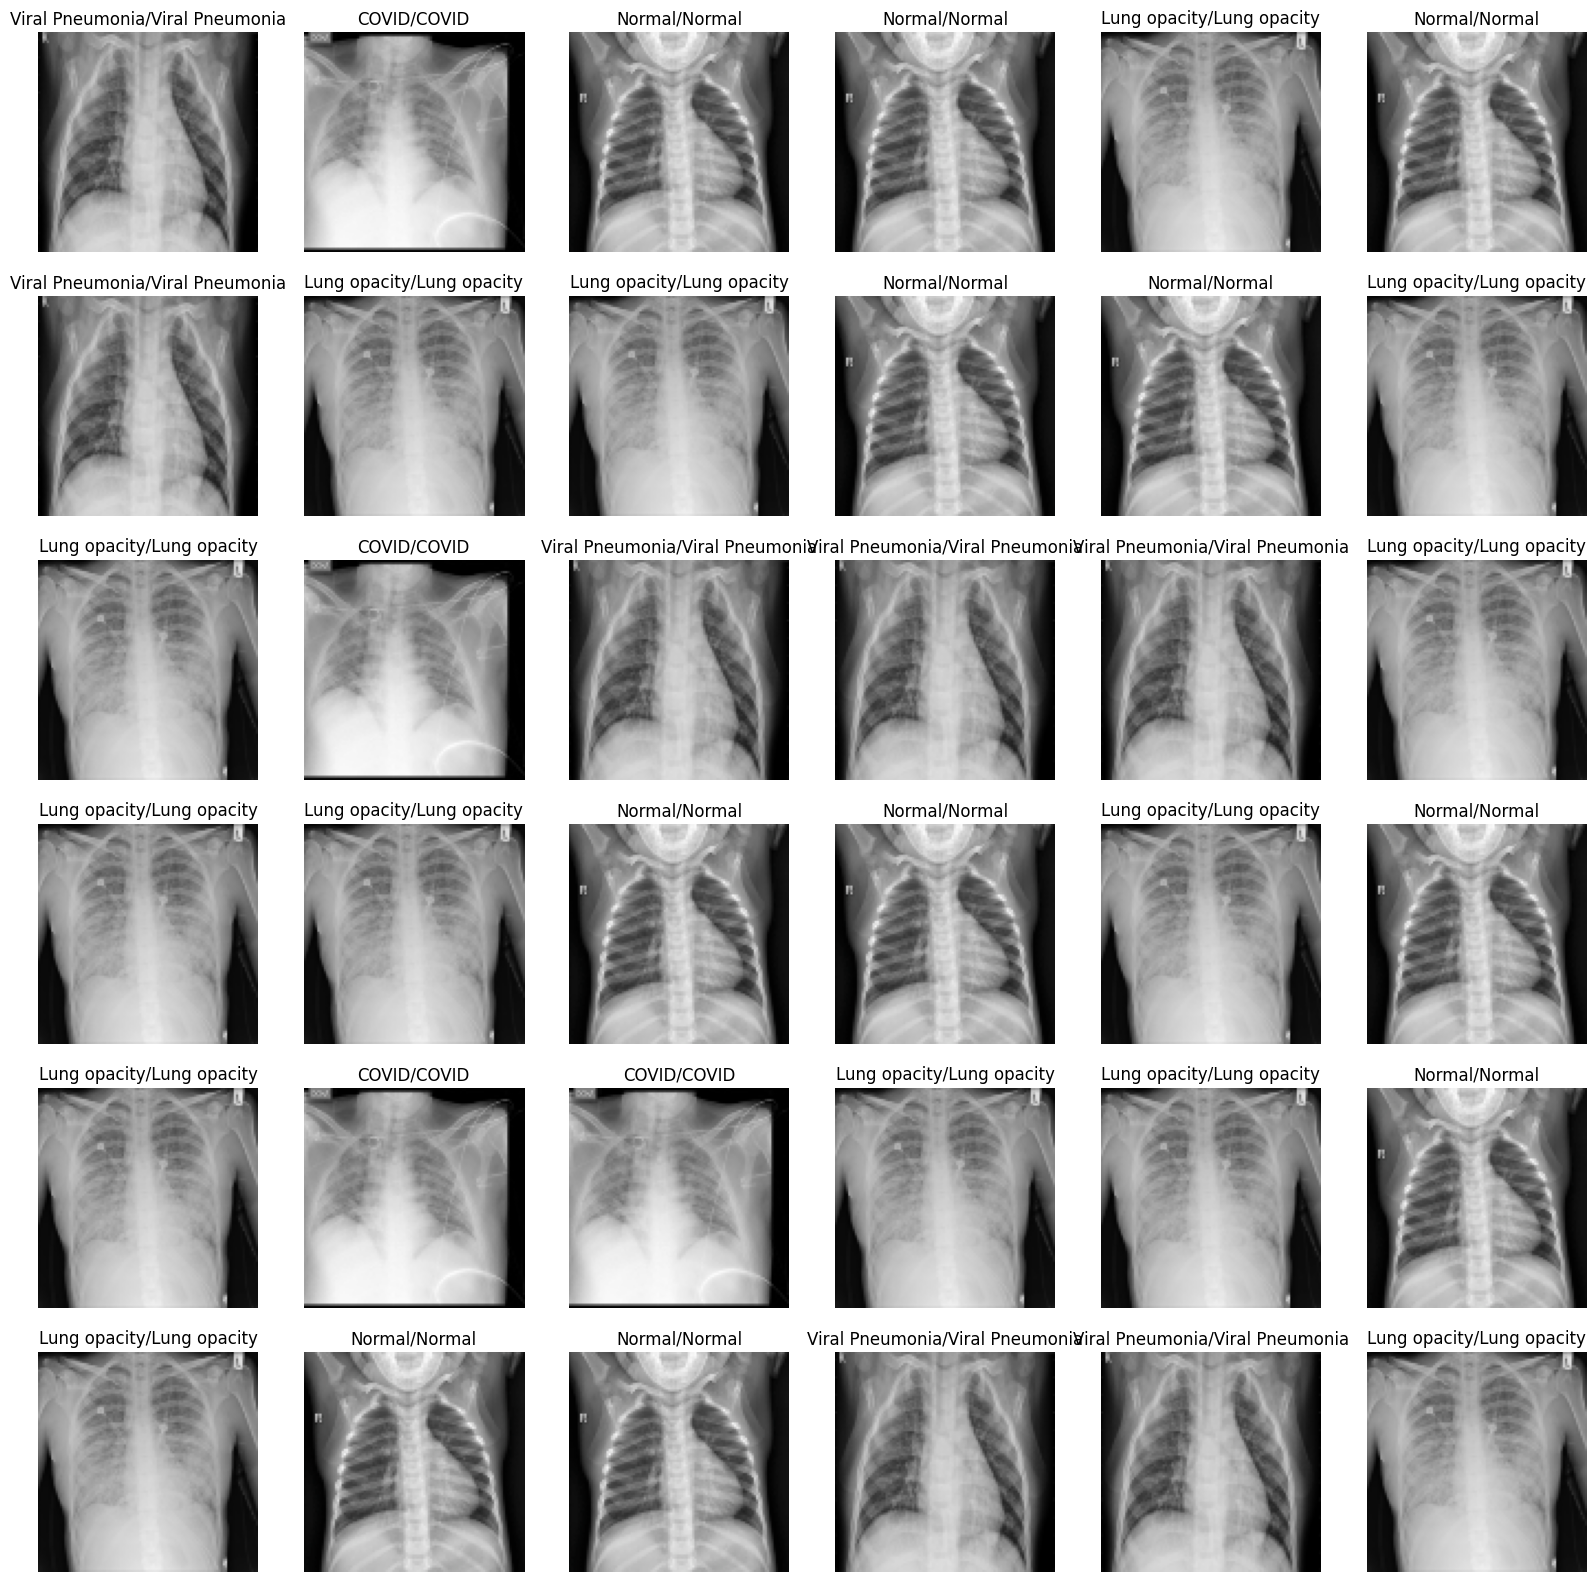

In [21]:
arr_ala={0:'COVID',
        1:'Normal',
        2:'Viral Pneumonia',
        3:'Lung opacity',
        }
plt.figure(figsize = (20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title(arr_ala[np.argmax(y_pr[i])]+'/'+arr_ala[y_test[i]])

In [25]:
x_img = []
image1 = cv2.imread('/kaggle/input/balanced-augmented-covid-cxr-dataset/Viral Pneumonia/16419.png')
image_array1 = cv2.resize(image1,(s,s))
x_img.append(list(image_array1))
x_img = np.array(x_img)
y_result =  kerasmodel.predict(x_img)
print(arr_ala[np.argmax(y_result)])
x_img = []


1/1 [==============================] - 0s 64ms/step
Viral Pneumonia


In [1]:
import tkinter as tk

# Create the main window
root = tk.Tk()
root.title("My GUI")

# Create a label widget
label = tk.Label(root, text="Hello, World!")
label.pack()

# Create a button widget
def button_click():
    label.config(text="Button clicked!")

button = tk.Button(root, text="Click me!", command=button_click)
button.pack()

# Run the main event loop
root.mainloop()